# Classification
In classification, the goal is to predict class label, which is a choice from a predefined of possibilities.
Classification is divided into binary classification(have positive and negative classes) and multiclass classification. You can image binary classification as classification that gives answers to yes/no questions.

In [1]:
# Import and setup libraries.
%matplotlib notebook
%matplotlib inline

import warnings
warnings.warn = lambda *args, **kwargs: None

import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import sklearn

plt.rc("font", size=14)
plt.rcParams["figure.figsize"] = (10, 5)

## Iris example:

y_train shape: (112,)
y_test shape: (38,)


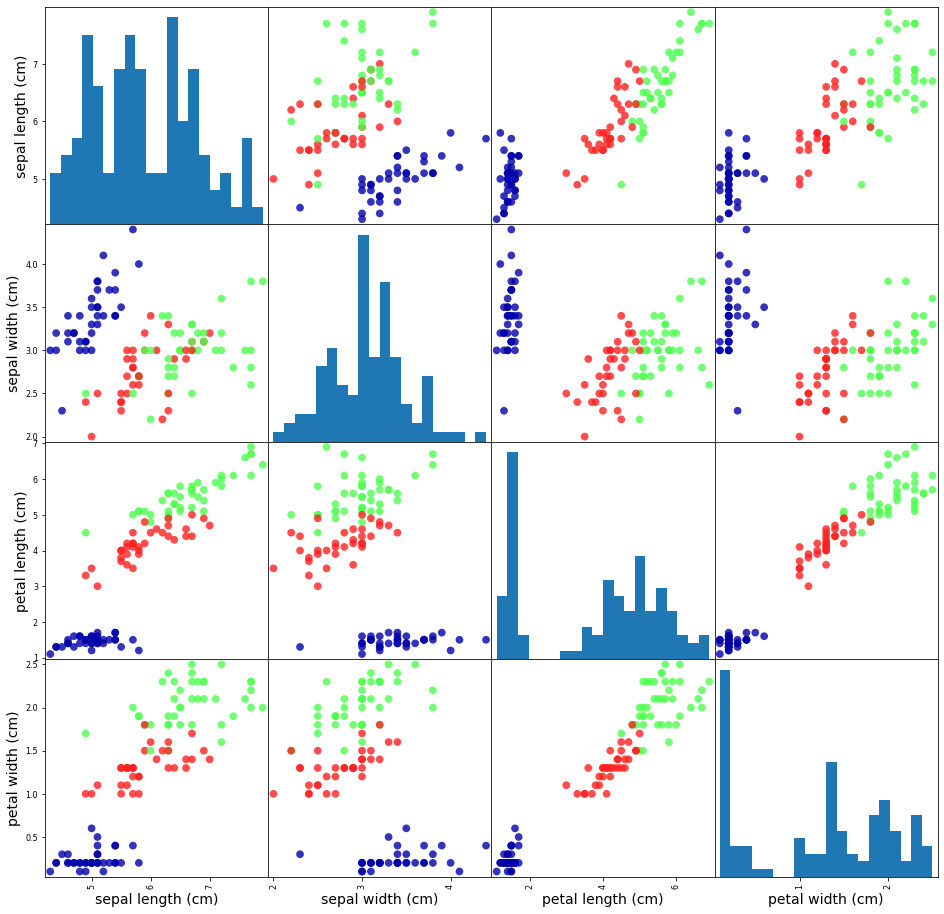

In [2]:
iris_ds = sklearn.datasets.load_iris()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_ds["data"], 
    iris_ds["target"], 
    random_state=0
)

# 'train_test_split' splits into 75% of the rows for train and 25% of the rows for test.
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Pair plot of the iris data.
grr = pd.plotting.scatter_matrix(
    pd.DataFrame(X_train, columns=iris_ds.feature_names),
    c=y_train,
    figsize=(16, 16),
    marker="o",
    hist_kwds={"bins": 20},
    s=60,
    alpha=0.8,
    cmap=mglearn.cm3
)

### k-nearest neighbors:

In [3]:
# Building a knn model.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Making prediction.
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = model.predict(X_new)
print(f"Predicted target name: {iris_ds['target_names'][prediction]}")
      
# Evaluating the model.
y_pred = model.predict(X_test)
print(f"Score: {np.mean(y_pred == y_test)}")
print(f"Score using 'score' method of knn object:{model.score(X_test, y_test)}")

Predicted target name: ['setosa']
Score: 0.9736842105263158
Score using 'score' method of knn object:0.9736842105263158


## Algorithms:

### k-nearest neighbors:
This is the simplest machine learning algorithm. A model stores all training set. It needs to search nearest data points for a prediction. If number if neighbors more than one, it uses a voting for assigning a label. 

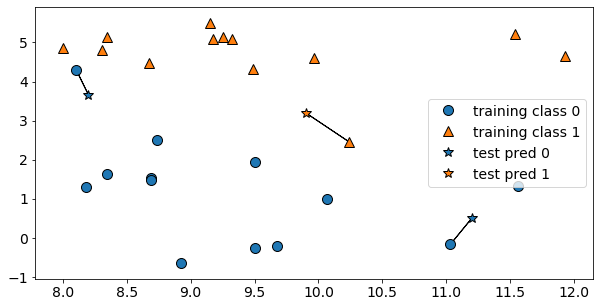

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

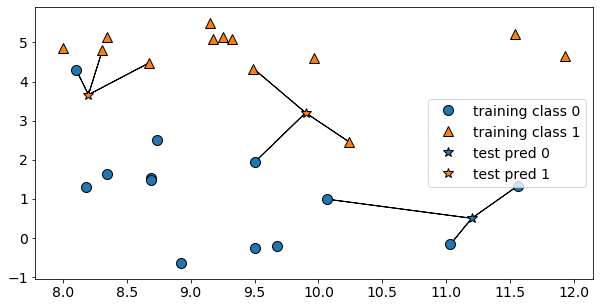

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Strengths:
* Easy to understand 
* Fast training

Weaknesses:
* Badly with datasets with many features
* If dataset is large, a prediction might be slow
* Badly with sparse datasets


### Linear classification

$
\begin{aligned}
&X^{l} = (x_{i}, y_{i})^{l}_{i=1}, \, x_{i} \in \mathbb{R}^{n}, \, y_{i} \in -1, +1 - \text{training sample} \\
&a(x, w) = sign \langle x, w \rangle = sign \sum_{j=1}^{n}w_{j} f_{j}(x), \, w \in \mathbb{R}^{n} - \text{classification model} \\
&L(a, y) = [\,ay < 0 ]\, = [\,\langle x, w \rangle y < 0]\, \leqslant L(\langle x, w \rangle y) - \text{loss function(ordinary least squares)} \\
&Q(w) = \sum_{i=1}^{l}[\,\langle x_{i}, w \rangle y_{i} < 0]\  \leqslant \sum_{i=1}^{l} L(\langle x_{i}, w \rangle y_{i})  \rightarrow \min_{w} - \text{learning method}
\end{aligned}
$

#### Margin
Margin describes an element position from a dividing surface. If margin is below zero, algorithm $g(x, w)$ makes an error. 

$
\begin{aligned}
&a(x, w) = sign \, g(x, w), \, g(x, w) - \text{discriminant function} \\
&g(x, w) = 0 - \text{dividing surface equation} \\
&M_{i} = g(x_{i}, w)y_{i} - \text{margin of } x_{i} \\
\end{aligned}
$